In [7]:
import pandas as pd
hotel=pd.read_csv('hotel_booking_data_cleaned.csv') #load data as pandas dataframe

# Based on the conclusion of the descriptive analysis just now, we preprocess the dataset as follows

# 删除 adr<0 和 adr>5000 的行
hotel = hotel[(hotel['adr'] >= 0) & (hotel['adr'] <= 5000)]

# 显示删除后的数据集
columns_to_drop = [ 'agent', 'company', 'country', 'reservation_status']
hotel = hotel.drop(columns=columns_to_drop, axis=1)

nan_replacements = {"children": 0 }
#替换缺失项得到新数据
hotel_cln = hotel.fillna(nan_replacements)

#替换full_data_cln中不规范值
#meal字段包含'Undefined'意味着自带食物SC
#关于meal字段缩写代表的意义，########333
hotel_cln["meal"].replace("Undefined", "SC", inplace=True)
hotel_cln["market_segment"].replace("Undefined", "Complementary", inplace=True)
hotel_cln["distribution_channel"].replace("Undefined", "Direct", inplace=True)
print(hotel_cln)

               hotel  is_canceled  lead_time  arrival_date_year  \
0       Resort Hotel            0        342               2015   
1       Resort Hotel            0        737               2015   
2       Resort Hotel            0          7               2015   
3       Resort Hotel            0         13               2015   
4       Resort Hotel            0         14               2015   
...              ...          ...        ...                ...   
119385    City Hotel            0         23               2017   
119386    City Hotel            0        102               2017   
119387    City Hotel            0         34               2017   
119388    City Hotel            0        109               2017   
119389    City Hotel            0        205               2017   

       arrival_date_month  arrival_date_week_number  \
0                    July                        27   
1                    July                        27   
2                    July     

In [8]:
hotel_cln.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests         0
reservation_status_date     

In [9]:
from sklearn.preprocessing import LabelEncoder
categorical_columns = hotel_cln.select_dtypes(include=['object']).columns
label_encoder = LabelEncoder()
for column in categorical_columns:
    hotel_cln[column]= label_encoder.fit_transform(hotel_cln[column])

print (hotel_cln)

        hotel  is_canceled  lead_time  arrival_date_year  arrival_date_month  \
0           1            0        342               2015                   5   
1           1            0        737               2015                   5   
2           1            0          7               2015                   5   
3           1            0         13               2015                   5   
4           1            0         14               2015                   5   
...       ...          ...        ...                ...                 ...   
119385      0            0         23               2017                   1   
119386      0            0        102               2017                   1   
119387      0            0         34               2017                   1   
119388      0            0        109               2017                   1   
119389      0            0        205               2017                   1   

        arrival_date_week_number  arriv

In [10]:
hotel_cln.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests         0
reservation_status_date     

In [11]:
hotel_cln.to_csv('3clean_hotel_data.csv', index=False)

In [12]:
from sklearn.model_selection import train_test_split # this function provides a single "Hold-Out" Validation.
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score #similar to MAE, we use accuracy_score evaluation metric.
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

data = pd.read_csv('3clean_hotel_data.csv',header='infer')
data.head(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date
0,1,0,342,2015,5,27,1,0,0,2,...,2,2,3,0,0,2,0.0,0,0,15
1,1,0,737,2015,5,27,1,0,0,2,...,2,2,4,0,0,2,0.0,0,0,15
2,1,0,7,2015,5,27,1,0,1,1,...,0,2,0,0,0,2,75.0,0,0,46
3,1,0,13,2015,5,27,1,0,1,1,...,0,0,0,0,0,2,75.0,0,0,46
4,1,0,14,2015,5,27,1,0,2,2,...,0,0,0,0,0,2,98.0,0,1,76


In [15]:
y = data['is_canceled'] #this is our prediction target
X = data.drop(['is_canceled'],axis=1)
#convert categorical into numerical
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Naive Bayes

In [10]:
model = GaussianNB()
model.fit(X_train, Y_train)

# print prediction results
predictions = model.predict(X_test)
# priors=None 是默认设置，模型将自动计算先验概率
#`var_smoothing` 参数用于指定在执行数据平滑时使用的方差值，以防止出现概率值为零的情况。默认值为 `1e-09`，通常情况下不需要调整这个参数，除非在特定情况下需要对数据进行额外的平滑处理。
print('Validation accuracy is %f' %accuracy_score(Y_test, predictions))
print(classification_report(Y_test, predictions))

Validation accuracy is 0.627917
              precision    recall  f1-score   support

           0       0.88      0.50      0.63     10305
           1       0.48      0.87      0.62      5506

    accuracy                           0.63     15811
   macro avg       0.68      0.69      0.63     15811
weighted avg       0.74      0.63      0.63     15811



### Feature select

In [22]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
pipe = Pipeline([
    ('pca', PCA(random_state=0)),
    ('model', GaussianNB())
])
# defining hyperparameter options
param_grid = {'pca__n_components': [0.7,0.8,0.9,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27]

              }

grid = GridSearchCV( pipe, param_grid, refit = True, verbose = 3)

# fitting the model for grid search
grid.fit(X, y)
print(grid.best_params_)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV 1/5] END .............pca__n_components=0.7;, score=0.653 total time=   0.3s
[CV 2/5] END .............pca__n_components=0.7;, score=0.653 total time=   0.3s
[CV 3/5] END .............pca__n_components=0.7;, score=0.653 total time=   0.3s
[CV 4/5] END .............pca__n_components=0.7;, score=0.653 total time=   0.2s
[CV 5/5] END .............pca__n_components=0.7;, score=0.653 total time=   0.4s
[CV 1/5] END .............pca__n_components=0.8;, score=0.653 total time=   0.2s
[CV 2/5] END .............pca__n_components=0.8;, score=0.653 total time=   0.3s
[CV 3/5] END .............pca__n_components=0.8;, score=0.653 total time=   0.2s
[CV 4/5] END .............pca__n_components=0.8;, score=0.653 total time=   0.2s
[CV 5/5] END .............pca__n_components=0.8;, score=0.653 total time=   0.2s
[CV 1/5] END .............pca__n_components=0.9;, score=0.563 total time=   0.2s
[CV 2/5] END .............pca__n_components=0.9

In [16]:
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
pca = PCA(n_components=23) # we select PCA algorithm with remaining 90% information
z = pca.fit(X).transform(X)

In [17]:
display(z[:5,:])

array([[-4.47931426e+02,  2.40119023e+02, -9.18017849e+01,
        -9.80556012e+00,  1.36542677e+00, -9.52823549e+00,
        -1.76207583e+00,  2.26789113e+00, -4.62582898e+00,
         8.93735275e-02, -1.40741020e+00,  4.34176225e-01,
        -4.81261425e-01,  1.24808090e-01,  5.45977832e-01,
        -3.09979705e-01,  2.32757996e+00,  1.45371391e+00,
         1.09214851e+00, -4.17327879e-01, -8.80157289e-01,
        -3.05846197e-02, -1.07336565e-01],
       [-4.49019775e+02,  6.34623984e+02, -7.72310424e+01,
        -2.10739058e+01,  8.13002561e+00, -9.20964155e+00,
        -2.10375514e+00,  2.80132560e+00, -6.36547328e+00,
         3.45051802e-01, -1.40370075e+00,  7.15258417e-01,
        -9.79520516e-01,  1.81567426e-01,  1.08172186e+00,
        -1.34030996e-02,  3.02894080e+00,  1.75549751e+00,
         1.42492049e+00, -8.53137693e-01, -1.40892473e+00,
         1.59730480e-01, -2.37099803e-01],
       [-4.15820388e+02, -9.71384890e+01, -2.93706643e+01,
         6.93090000e-01, -2.3

In [21]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(GaussianNB(), z, y, cv=5)
Iscores = cross_val_score(GaussianNB(), X, y, cv=5)
print('Naive Bayes CV Score:', scores)
print('The initial Naive Bayes CV Score:', Iscores)

Naive Bayes CV Score: [0.64096658 0.65466119 0.66793701 0.61892198 0.63232399]
The initial Naive Bayes CV Score: [0.67166429 0.59251194 0.57873356 0.49390627 0.41328475]


In [22]:
# 假设 pca 是已经fit过的 PCA 模型  
# 假设 X 是你的原始数据，columns 是特征的列名  
pca_component_names = [f"PC{i+1}" for i in range(pca.n_components_)]  
component_loadings = pca.components_  
  
# 创建一个 DataFrame 来存储每个主成分与原始特征的关系  
import pandas as pd  
component_loadings_df = pd.DataFrame(component_loadings.T, columns=pca_component_names, index=[f"Feature_{i+1}" for i in range(component_loadings.shape[1])])  
  
# 显示主成分与原始特征的关系  
display(component_loadings_df)  

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23
Feature_1,2.812355e-05,-3.257367e-04,-0.001049,-0.001768,-0.000625,-0.000005,-0.007317,0.083464,0.018489,0.020336,...,0.027602,0.059616,0.016606,-0.016020,-0.017530,0.030681,0.032060,-0.492021,-0.845076,0.054298
Feature_2,-2.755460e-03,9.987467e-01,0.036887,-0.028526,0.017126,0.000806,-0.000855,0.001273,-0.004438,0.000554,...,0.000119,0.000761,0.000241,-0.000381,0.000166,0.000077,-0.001068,-0.001539,0.000546,-0.000279
Feature_3,3.928952e-05,2.333171e-04,0.003049,-0.002496,0.030100,0.003626,-0.010391,-0.004787,0.002700,0.009306,...,0.023138,0.071865,-0.097414,0.078450,-0.734273,0.245394,0.518980,0.247773,-0.097312,0.061713
Feature_4,1.639561e-04,2.940093e-03,-0.007834,0.006653,-0.084607,-0.024590,0.995115,0.007325,0.033620,-0.000298,...,0.005826,0.004789,-0.005422,0.001943,-0.003660,0.003106,0.009445,0.001165,-0.006263,0.006803
Feature_5,1.629568e-03,1.623640e-02,0.027784,0.007886,-0.993818,-0.054138,-0.086048,0.002655,-0.001893,-0.001443,...,-0.000606,-0.001699,-0.003818,0.003424,-0.021522,0.005953,0.015255,0.008111,-0.002157,0.001713
Feature_6,1.038631e-02,3.454247e-04,0.005108,0.010606,-0.055886,0.998072,0.019587,0.002697,0.008785,0.001076,...,0.000005,0.001287,0.000937,-0.000748,0.000785,-0.000354,-0.000596,-0.000795,0.000896,-0.000156
Feature_7,5.065159e-05,7.884700e-04,0.001251,-0.003982,-0.000008,-0.002808,-0.014200,0.131612,0.268976,0.039799,...,0.935963,-0.026379,0.138401,-0.021494,-0.025340,-0.032014,-0.009148,0.020780,0.038760,-0.007120
Feature_8,3.431246e-05,2.931626e-03,0.003306,-0.003255,0.002224,-0.007855,-0.027238,0.372566,0.834631,0.235319,...,-0.303603,-0.008187,0.002968,-0.023023,-0.008780,-0.033076,0.011667,0.027788,0.034672,0.004470
Feature_9,-4.370146e-05,6.231837e-04,0.003046,-0.000676,0.000595,-0.000075,-0.007265,0.033589,0.011809,-0.059392,...,0.029242,0.027888,-0.097107,-0.175837,0.584961,0.143199,0.755442,0.017377,0.025971,0.122581
Feature_10,1.501626e-05,-1.613471e-04,0.002810,-0.000350,0.000692,0.000240,-0.004416,0.042791,-0.021518,-0.006945,...,0.003797,-0.007191,-0.010912,0.044091,-0.031160,-0.012813,-0.130139,-0.032975,0.080790,0.983973


# Neural Net

In [14]:
from sklearn.model_selection import GridSearchCV

# defining hyperparameter options
param_grid = {'alpha': [0.001,0.01,0.1,1,2],
              'max_iter': [200,300,500,700,1000]
              }

grid = GridSearchCV( MLPClassifier(random_state=0), param_grid, refit = True, verbose = 3)

# fitting the model for grid search
grid.fit(X_train, Y_train)
print(grid.best_params_)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:693: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


[CV 1/5] END .........alpha=0.001, max_iter=200;, score=0.954 total time=  23.4s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:693: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


[CV 2/5] END .........alpha=0.001, max_iter=200;, score=0.887 total time=  17.5s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:693: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


[CV 3/5] END .........alpha=0.001, max_iter=200;, score=0.767 total time=   1.2s
[CV 4/5] END .........alpha=0.001, max_iter=200;, score=0.962 total time=  29.7s
[CV 5/5] END .........alpha=0.001, max_iter=200;, score=0.945 total time=  20.9s
[CV 1/5] END .........alpha=0.001, max_iter=300;, score=0.961 total time=  18.8s
[CV 2/5] END .........alpha=0.001, max_iter=300;, score=0.890 total time=  20.1s
[CV 3/5] END .........alpha=0.001, max_iter=300;, score=0.945 total time=  21.7s
[CV 4/5] END .........alpha=0.001, max_iter=300;, score=0.962 total time=  18.2s
[CV 5/5] END .........alpha=0.001, max_iter=300;, score=0.945 total time=  20.0s
[CV 1/5] END .........alpha=0.001, max_iter=500;, score=0.961 total time=  16.9s
[CV 2/5] END .........alpha=0.001, max_iter=500;, score=0.890 total time=  22.2s
[CV 3/5] END .........alpha=0.001, max_iter=500;, score=0.945 total time=  15.2s
[CV 4/5] END .........alpha=0.001, max_iter=500;, score=0.962 total time=  14.9s
[CV 5/5] END .........alpha=

In [18]:
# train the model on train set
model =MLPClassifier(alpha=0.001, max_iter=300,random_state=4)
model.fit(X_train, Y_train)

# print prediction results
predictions = model.predict(X_test)
print('Validation accuracy is %f' %accuracy_score(Y_test, predictions))
print(classification_report(Y_test, predictions))

Validation accuracy is 0.962643
              precision    recall  f1-score   support

           0       0.95      1.00      0.97     14904
           1       1.00      0.90      0.95      8974

    accuracy                           0.96     23878
   macro avg       0.97      0.95      0.96     23878
weighted avg       0.96      0.96      0.96     23878



### Feature select

In [8]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

pipe = Pipeline([
    ('pca', PCA(random_state=0)),
    ('model', MLPClassifier(alpha=0.001, max_iter=200))
])
# defining hyperparameter options
param_grid = {'pca__n_components': [6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27]

              }

grid = GridSearchCV( pipe, param_grid, refit = True, verbose = 3)

# fitting the model for grid search
grid.fit(X, y)
print(grid.best_params_)

Fitting 5 folds for each of 22 candidates, totalling 110 fits
[CV 1/5] END ...............pca__n_components=6;, score=0.856 total time=  42.5s
[CV 2/5] END ...............pca__n_components=6;, score=0.841 total time=  32.3s
[CV 3/5] END ...............pca__n_components=6;, score=0.833 total time=  28.1s
[CV 4/5] END ...............pca__n_components=6;, score=0.809 total time=  38.9s
[CV 5/5] END ...............pca__n_components=6;, score=0.829 total time=  21.3s
[CV 1/5] END ...............pca__n_components=7;, score=0.854 total time=  45.6s
[CV 2/5] END ...............pca__n_components=7;, score=0.860 total time=  40.1s
[CV 3/5] END ...............pca__n_components=7;, score=0.829 total time=  26.0s
[CV 4/5] END ...............pca__n_components=7;, score=0.787 total time=  35.4s
[CV 5/5] END ...............pca__n_components=7;, score=0.861 total time=  48.3s
[CV 1/5] END ...............pca__n_components=8;, score=0.860 total time=  35.0s
[CV 2/5] END ...............pca__n_components=8

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END ...............pca__n_components=8;, score=0.869 total time=  58.7s
[CV 4/5] END ...............pca__n_components=8;, score=0.842 total time=  29.6s
[CV 5/5] END ...............pca__n_components=8;, score=0.877 total time=  22.9s
[CV 1/5] END ...............pca__n_components=9;, score=0.923 total time=  26.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END ...............pca__n_components=9;, score=0.940 total time=  58.4s
[CV 3/5] END ...............pca__n_components=9;, score=0.936 total time=  40.4s
[CV 4/5] END ...............pca__n_components=9;, score=0.930 total time=  24.4s
[CV 5/5] END ...............pca__n_components=9;, score=0.907 total time=  26.6s
[CV 1/5] END ..............pca__n_components=10;, score=0.940 total time=  34.1s
[CV 2/5] END ..............pca__n_components=10;, score=0.935 total time=  34.7s
[CV 3/5] END ..............pca__n_components=10;, score=0.927 total time=  33.9s
[CV 4/5] END ..............pca__n_components=10;, score=0.939 total time=  33.8s
[CV 5/5] END ..............pca__n_components=10;, score=0.891 total time=  32.8s
[CV 1/5] END ..............pca__n_components=11;, score=0.935 total time=  31.7s
[CV 2/5] END ..............pca__n_components=11;, score=0.948 total time=  39.7s
[CV 3/5] END ..............pca__n_components=11;, score=0.940 total time=  31.2s
[CV 4/5] END ..............p

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END ..............pca__n_components=12;, score=0.938 total time=  51.1s
[CV 2/5] END ..............pca__n_components=12;, score=0.949 total time=  43.1s
[CV 3/5] END ..............pca__n_components=12;, score=0.925 total time=  35.6s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END ..............pca__n_components=12;, score=0.935 total time=  52.9s
[CV 5/5] END ..............pca__n_components=12;, score=0.903 total time=  38.9s
[CV 1/5] END ..............pca__n_components=13;, score=0.943 total time=  44.2s
[CV 2/5] END ..............pca__n_components=13;, score=0.938 total time=  23.2s
[CV 3/5] END ..............pca__n_components=13;, score=0.932 total time=  30.8s
[CV 4/5] END ..............pca__n_components=13;, score=0.937 total time=  42.6s
[CV 5/5] END ..............pca__n_components=13;, score=0.915 total time=  33.4s
[CV 1/5] END ..............pca__n_components=14;, score=0.951 total time=  42.3s
[CV 2/5] END ..............pca__n_components=14;, score=0.933 total time=  27.7s
[CV 3/5] END ..............pca__n_components=14;, score=0.946 total time=  33.7s
[CV 4/5] END ..............pca__n_components=14;, score=0.947 total time=  45.6s
[CV 5/5] END ..............pca__n_components=14;, score=0.920 total time=  28.4s
[CV 1/5] END ..............p

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5] END ..............pca__n_components=16;, score=0.931 total time=  53.6s
[CV 5/5] END ..............pca__n_components=16;, score=0.931 total time=  35.1s
[CV 1/5] END ..............pca__n_components=17;, score=0.961 total time=  25.2s
[CV 2/5] END ..............pca__n_components=17;, score=0.968 total time=  34.5s
[CV 3/5] END ..............pca__n_components=17;, score=0.919 total time=  44.5s
[CV 4/5] END ..............pca__n_components=17;, score=0.934 total time=  31.9s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5] END ..............pca__n_components=17;, score=0.901 total time=  51.0s
[CV 1/5] END ..............pca__n_components=18;, score=0.959 total time=  41.0s
[CV 2/5] END ..............pca__n_components=18;, score=0.948 total time=  47.1s
[CV 3/5] END ..............pca__n_components=18;, score=0.926 total time=  38.0s
[CV 4/5] END ..............pca__n_components=18;, score=0.945 total time=  44.8s
[CV 5/5] END ..............pca__n_components=18;, score=0.948 total time=  41.0s
[CV 1/5] END ..............pca__n_components=19;, score=0.956 total time=  48.4s
[CV 2/5] END ..............pca__n_components=19;, score=0.957 total time=  39.0s
[CV 3/5] END ..............pca__n_components=19;, score=0.887 total time=  35.3s
[CV 4/5] END ..............pca__n_components=19;, score=0.937 total time=  48.2s
[CV 5/5] END ..............pca__n_components=19;, score=0.906 total time=  44.1s
[CV 1/5] END ..............pca__n_components=20;, score=0.969 total time=  33.1s
[CV 2/5] END ..............p

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5] END ..............pca__n_components=23;, score=0.961 total time=  58.1s
[CV 2/5] END ..............pca__n_components=23;, score=0.956 total time=  31.5s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5] END ..............pca__n_components=23;, score=0.888 total time= 1.0min
[CV 4/5] END ..............pca__n_components=23;, score=0.721 total time=  38.9s
[CV 5/5] END ..............pca__n_components=23;, score=0.783 total time=  34.5s
[CV 1/5] END ..............pca__n_components=24;, score=0.954 total time=  41.2s
[CV 2/5] END ..............pca__n_components=24;, score=0.939 total time=  54.9s
[CV 3/5] END ..............pca__n_components=24;, score=0.894 total time=  47.0s
[CV 4/5] END ..............pca__n_components=24;, score=0.825 total time=  37.2s
[CV 5/5] END ..............pca__n_components=24;, score=0.681 total time=  33.8s
[CV 1/5] END ..............pca__n_components=25;, score=0.965 total time=  38.0s
[CV 2/5] END ..............pca__n_components=25;, score=0.933 total time=  35.9s
[CV 3/5] END ..............pca__n_components=25;, score=0.846 total time=  38.8s
[CV 4/5] END ..............pca__n_components=25;, score=0.756 total time=  45.6s
[CV 5/5] END ..............p

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5] END ..............pca__n_components=26;, score=0.941 total time= 1.0min
[CV 3/5] END ..............pca__n_components=26;, score=0.801 total time=  50.8s
[CV 4/5] END ..............pca__n_components=26;, score=0.743 total time=  41.5s
[CV 5/5] END ..............pca__n_components=26;, score=0.457 total time=  47.3s
[CV 1/5] END ..............pca__n_components=27;, score=0.954 total time=  30.4s
[CV 2/5] END ..............pca__n_components=27;, score=0.934 total time=  44.1s
[CV 3/5] END ..............pca__n_components=27;, score=0.877 total time=  46.5s
[CV 4/5] END ..............pca__n_components=27;, score=0.656 total time=  49.9s
[CV 5/5] END ..............pca__n_components=27;, score=0.470 total time=  33.3s
{'pca__n_components': 18}


In [23]:
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
pca = PCA(n_components=18) # we select PCA algorithm with remaining 90% information
z = pca.fit(X).transform(X)

In [24]:
display(z[:5,:])

array([[-4.47931426e+02,  2.40119023e+02, -9.18017849e+01,
        -9.80556012e+00,  1.36542677e+00, -9.52823549e+00,
        -1.76207583e+00,  2.26789113e+00, -4.62582898e+00,
         8.93735275e-02, -1.40741020e+00,  4.34176225e-01,
        -4.81261425e-01,  1.24808090e-01,  5.45977832e-01,
        -3.09979705e-01,  2.32757996e+00,  1.45371391e+00],
       [-4.49019775e+02,  6.34623984e+02, -7.72310424e+01,
        -2.10739058e+01,  8.13002561e+00, -9.20964155e+00,
        -2.10375514e+00,  2.80132560e+00, -6.36547328e+00,
         3.45051802e-01, -1.40370075e+00,  7.15258417e-01,
        -9.79520516e-01,  1.81567426e-01,  1.08172186e+00,
        -1.34030996e-02,  3.02894080e+00,  1.75549751e+00],
       [-4.15820388e+02, -9.71384890e+01, -2.93706643e+01,
         6.93090000e-01, -2.31864621e+00, -1.04240864e+01,
        -7.24579583e-01, -3.62560782e-01, -1.84960143e+00,
         8.04425043e-01, -1.92701744e+00, -4.38130758e-02,
        -3.95324043e-02, -4.10387446e-01,  1.00720262e

In [25]:
from sklearn.model_selection import cross_val_score
Scores = cross_val_score(model, z, y, cv=5)
Iscores = cross_val_score(model, X, y, cv=5)
print('The initial Neural Net CV Score:', Scores)
print('The initial Neural Net CV Score:', Iscores)

The initial Neural Net CV Score: [0.93634308 0.81384538 0.81392914 0.97139507 0.91623738]


In [26]:
# 假设 pca 是已经fit过的 PCA 模型  
# 假设 X 是你的原始数据，columns 是特征的列名  
pca_component_names = [f"PC{i+1}" for i in range(pca.n_components_)]  
component_loadings = pca.components_  
  
# 创建一个 DataFrame 来存储每个主成分与原始特征的关系  
import pandas as pd  
component_loadings_df = pd.DataFrame(component_loadings.T, columns=pca_component_names, index=[f"Feature_{i+1}" for i in range(component_loadings.shape[1])])  
  
# 显示主成分与原始特征的关系  
display(component_loadings_df)  

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18
Feature_1,2.812355e-05,-3.257367e-04,-0.001049,-0.001768,-0.000625,-0.000005,-0.007317,0.083464,0.018489,0.020336,-0.029980,0.036892,0.005950,0.027602,0.059616,0.016606,-0.016020,-0.017530
Feature_2,-2.755460e-03,9.987467e-01,0.036887,-0.028526,0.017126,0.000806,-0.000855,0.001273,-0.004438,0.000554,0.000121,0.000531,-0.000971,0.000119,0.000761,0.000241,-0.000381,0.000166
Feature_3,3.928952e-05,2.333171e-04,0.003049,-0.002496,0.030100,0.003626,-0.010391,-0.004787,0.002700,0.009306,0.034360,0.030390,-0.176444,0.023138,0.071865,-0.097414,0.078450,-0.734273
Feature_4,1.639561e-04,2.940093e-03,-0.007834,0.006653,-0.084607,-0.024590,0.995115,0.007325,0.033620,-0.000298,0.011307,0.014316,-0.007705,0.005826,0.004789,-0.005422,0.001943,-0.003660
Feature_5,1.629568e-03,1.623640e-02,0.027784,0.007886,-0.993818,-0.054138,-0.086048,0.002655,-0.001893,-0.001443,0.002538,0.000902,-0.005671,-0.000606,-0.001699,-0.003818,0.003424,-0.021522
Feature_6,1.038631e-02,3.454247e-04,0.005108,0.010606,-0.055886,0.998072,0.019587,0.002697,0.008785,0.001076,0.000202,0.000692,0.002505,0.000005,0.001287,0.000937,-0.000748,0.000785
Feature_7,5.065159e-05,7.884700e-04,0.001251,-0.003982,-0.000008,-0.002808,-0.014200,0.131612,0.268976,0.039799,0.011344,0.032374,0.080315,0.935963,-0.026379,0.138401,-0.021494,-0.025340
Feature_8,3.431246e-05,2.931626e-03,0.003306,-0.003255,0.002224,-0.007855,-0.027238,0.372566,0.834631,0.235319,-0.101433,-0.038999,-0.016349,-0.303603,-0.008187,0.002968,-0.023023,-0.008780
Feature_9,-4.370146e-05,6.231837e-04,0.003046,-0.000676,0.000595,-0.000075,-0.007265,0.033589,0.011809,-0.059392,0.041196,-0.010148,0.034365,0.029242,0.027888,-0.097107,-0.175837,0.584961
Feature_10,1.501626e-05,-1.613471e-04,0.002810,-0.000350,0.000692,0.000240,-0.004416,0.042791,-0.021518,-0.006945,0.004398,-0.011054,0.007501,0.003797,-0.007191,-0.010912,0.044091,-0.031160


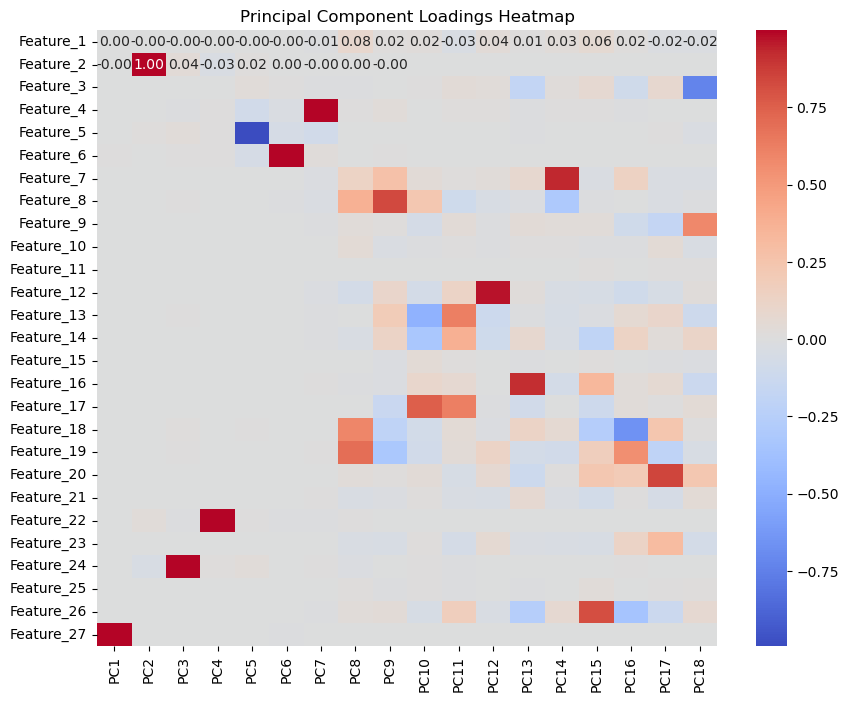

In [27]:
import seaborn as sns  
import matplotlib.pyplot as plt  
  
# 创建热力图  
plt.figure(figsize=(10, 8))  
heatmap = sns.heatmap(component_loadings_df, annot=True, cmap="coolwarm", fmt=".2f")  
plt.title('Principal Component Loadings Heatmap')  
plt.show()  